From https://github.com/MARDAScience/SediNet/blob/master/notebooks/SediNet_Continuous_SievedSand_sieveplus4Prcs.ipynb

This dataset has only 400 images, but they are large ~(3000x2000). You can to predict the PX values and plot it similar to the notebook above

In [1]:
%pylab inline
import pandas as pd
from tqdm.auto import tqdm
from pathlib import Path
import lasio
from pprint import pprint
import PIL
import shutil
from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_in = Path("../../data/raw/SediNet")

In [26]:
csv_file = pd.read_csv(data_in / "grain_size_sieved_sands" / "data_pescadero_sieve.csv")
csv_file

,files,sieve_lower,sieve_upper,sieve,P16,P25,P50,P75,P84,P90
0,images/IMG_0202.JPG,1000,1400,1200.0,73.000000,77.062500,84.428571,94.250000,98.000000,113.000000
1,images/IMG_0203.JPG,1000,1400,1200.0,70.500000,79.250000,88.833333,98.416667,103.000000,113.000000
2,images/IMG_0204.JPG,1000,1400,1200.0,72.375000,75.812500,86.750000,94.250000,100.500000,118.000000
3,images/IMG_0205.JPG,1000,1400,1200.0,69.666667,76.035714,80.500000,95.083333,100.500000,105.500000
4,images/IMG_0207.JPG,710,1000,855.0,56.750000,62.062500,71.125000,77.375000,86.333333,90.500000
5,images/IMG_0208.JPG,710,1000,855.0,52.166667,55.083333,63.833333,73.937500,77.166667,79.666667
6,images/IMG_0209.JPG,710,1000,855.0,60.500000,62.107143,71.000000,79.250000,86.125000,88.000000
7,images/IMG_0210.JPG,710,1000,855.0,57.285714,59.562500,67.500000,72.750000,77.000000,81.333333
8,images/IMG_0212.JPG,500,710,605.0,41.750000,45.187500,49.666667,53.750000,58.000000,59.250000
9,images/IMG_0213.JPG,500,710,605.0,41.750000,43.250000,48.833333,56.958333,59.666667,64.666667


(2592, 1944) <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2592x1944 at 0x7FD486DCC978> files          images/IMG_0225.JPG
sieve_lower                    180
sieve_upper                    250
sieve                          215
P16                        23.3333
P25                        24.0833
P50                          26.75
P75                        31.0357
P84                        32.6429
P90                          34.25
Name: 19, dtype: object


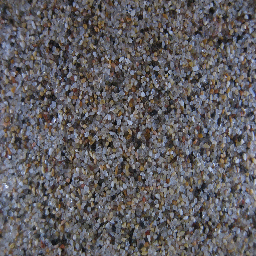

In [27]:
for i, row in csv_file.sample(5).iterrows():
    break
im = PIL.Image.open(data_in / row["files"])
print(im.size, im, row)
im.resize((256, 256))

TODO:
    - copy only ones we use to processed
    - break into smaller images